## Introduction PCA and Global Structure

PCA aims to find a **linear** subspace such the projection onto this subspace preserves the global structure of the data. When the datapoints lie in $\mathbb{R}^2$, this corresponds to finding a *line* such that projection onto the line respects the original data. In this problem, we will explore the conditions under which PCA fails to preserve global structure.



### Part A: PCA on non-linear data

We first create two datasets called `spiral` and `circle` using `numpy`.  We plot these datasets using `matplotlib`. 

**NOTE: you do not need to modify this code**

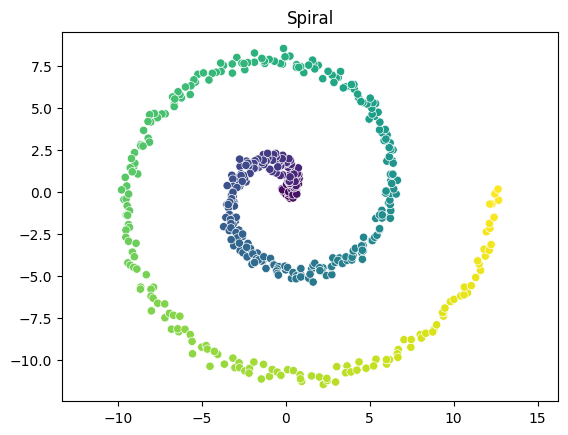

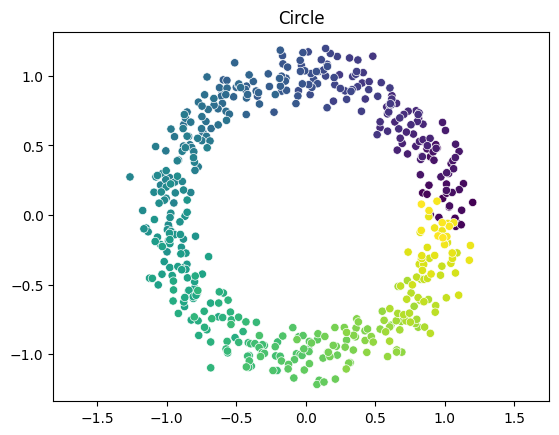

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Spiral with noise
theta = np.linspace(0, 4*np.pi, 500)
r = theta

x = r * np.cos(theta)
y = r * np.sin(theta)

noise = np.random.normal(0, 0.2, x.shape)
x += noise

noise = np.random.normal(0, 0.3, y.shape)
y += noise

spiral = np.array([x, y])
spiral_colors = theta.copy()
spiral_colors = (spiral_colors - np.min(spiral_colors)) / (np.max(spiral_colors) - np.min(spiral_colors))
spiral_cmap = plt.get_cmap('viridis')
spiral_cmap = {i: spiral_cmap(s) for (i, s) in enumerate(spiral_colors)}

sns.scatterplot(x=x, y=y, hue=range(len(x)), palette=spiral_cmap, legend=False)
plt.axis('equal')
plt.title('Spiral')
plt.show()

# Circle with noise
theta = np.linspace(0, 2*np.pi, 500)
r = 1

x = r * np.cos(theta)
y = r * np.sin(theta)

noise = np.random.normal(0, 0.1, x.shape)
x += noise

noise = np.random.normal(0, 0.1, y.shape)
y += noise

circle_colors = theta.copy()
circle_colors = (circle_colors - np.min(circle_colors)) / (np.max(circle_colors) - np.min(circle_colors))
circle_cmap = plt.get_cmap('viridis')
circle_cmap = {i: circle_cmap(s) for (i, s) in enumerate(circle_colors)}

circle = np.array([x, y])

sns.scatterplot(x=x, y=y, hue=range(len(x)), palette=circle_cmap, legend=False)
plt.axis('equal')
plt.title('Circle')
plt.show()

## Part A: PCA on non-linear data

Use the `PCA` class with `n_components=1` from `sklearn` to perform principal 
component analysis on the `circle` and `spiral` arrays. 

Then, make two plots: one for the `circle` dataset and one for the `spiral` datasets.  Each plot should include the original shape and its projection onto the line output by PCA. Use distinct colors for both the shape and its projection. 

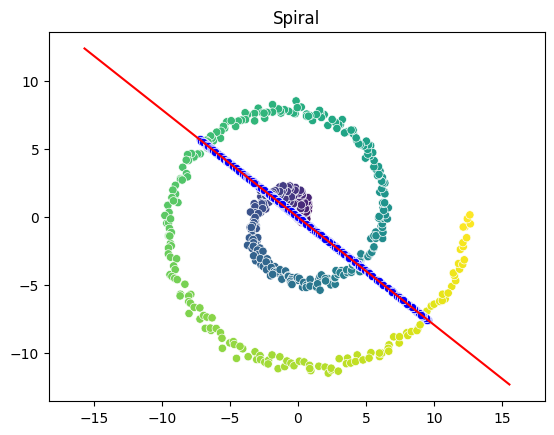

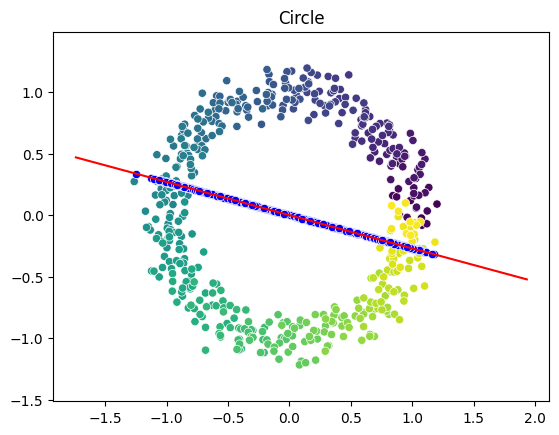

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

##### SPIRAL ######
pca1 = PCA(n_components=1)
pca1.fit(spiral.T)
v = pca1.components_
v0 = v[0].reshape(-1,1)
x = []
y = []
for i in range(-120, 120, 1):
  x.append(i/6.0 * v0[0])
  y.append(i/6.0 * v0[1])

# projection onto vector
proj_x = []
proj_y = []
proj_spiral = (v0 @ v0.T @ spiral).T
for i in range(len(proj_spiral)):
  row = proj_spiral[i]
  proj_x.append(row[0])
  proj_y.append(row[1])

# graph original shape
sns.scatterplot(x=spiral[0], y=spiral[1], hue=range(len(spiral[0])), palette=spiral_cmap, legend=False)

# graph projection onto the line output by PCA
sns.scatterplot(x=proj_x, y=proj_y, color='blue', legend=False)

# graph line
plt.plot(x, y, color='red')

plt.axis('equal')
plt.title('Spiral')
plt.show()

##### CIRCLE ######
pca2 = PCA(n_components=1)
pca2.fit(circle.T)
v = pca2.components_
v0 = v[0].reshape(-1,1)
x = []
y = []
for i in range(-10, 10, 1):
  x.append(i/5.0 * v0[0])
  y.append(i/5.0 * v0[1])

# projection onto vector
proj_x = []
proj_y = []
proj_circle = (v0 @ v0.T @ circle).T
for i in range(len(proj_circle)):
  row = proj_circle[i]
  proj_x.append(row[0])
  proj_y.append(row[1])

# graph original shape
sns.scatterplot(x=circle[0], y=circle[1], hue=range(len(circle[0])), palette=circle_cmap, legend=False)

# graph projection onto the line output by PCA
sns.scatterplot(x=proj_x, y=proj_y, color='blue', legend=False)

# graph line
plt.plot(x, y, color='red')

plt.axis('equal')
plt.title('Circle')
plt.show()

## Part B: Constructing a mutual k-NN Graph

As seen above, PCA does not provide a good embedding
for either the circle or spiral dataset. Here, we will
explore a different approach using the mutual k-NN graph.
As a first step, fill in the definition of a function `mutual_knn` that 
constructs the adjacency matrix of the k-NN graph from data.  
The inputs to `mutual_knn` are the value of parameter `k` and a a $N \times 2$ matrix `X` of data
in $\mathbb{R}^2$.

The function `mutual_knn` will return the $N\times N$ adjacency matrix of the mutual k-NN graph.

In [ ]:
import numpy as np

"""
Returns the adjacency matrix of the mutual k-NN graph of the datapoints in X.

Input: 
  - X is the set of data points : N x 2 numpy array
  - k is the number of neighbors in the k-NN graph : integer
Output:
  - A is the adjacency matrix of the k-NN graph : N x N numpy array
"""
def mutual_knn(X, k):
  distance_matrix = np.zeros((X.shape[0], X.shape[0]))
  adjacency_matrix = np.zeros_like(distance_matrix)
  for i in range(X.shape[0]):
    curr = X[i]
    dists = np.full(X.shape[0], np.inf)
    for j in range(X.shape[0]):
      # start here
      if j != i:
        dist = np.linalg.norm(curr - X[j])
        dists[j] = dist
        distance_matrix[i][j] = dist
    sort_index = np.argsort(dists) # argsort gives indices of sorted arr 
    for j in sort_index[:k]: # first k indices in sorted order
      adjacency_matrix[i][j] = 1
      adjacency_matrix[j][i] = 1
  return adjacency_matrix

# TEST CASE:

X_example = np.array([[0.40119806, 0.95007059],
                      [0.65236515, 0.38526264],
                      [0.00477139, 0.77900134],
                      [0.44104614, 0.37279229],
                      [0.45596702, 0.55480437],
                      [0.18737567, 0.13511045],
                      [0.93997045, 0.71418597],
                      [0.19926275, 0.16164293]])

X_adjacency = np.array([
    [0., 0., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 0., 1., 0.],
    [1., 0., 0., 1., 1., 0., 0., 0.],
    [0., 1., 0., 0., 1., 0., 0., 1.],
    [1., 1., 0., 1., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 0., 0., 1.],
    [1., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 0., 0.]]
)

# if this throws an error, you've done something wrong
assert np.all(mutual_knn(X_example, 3) == (X_adjacency.T.astype(bool) | X_adjacency.astype(bool)).astype(int))
# assert np.all(mutual_knn(X_example, 3) == X_adjacency) 

## Part C: Spectral Embedding

We can use the adjacency matrix of the mutual k-NN graph
to perform a different type of embedding: the spectral
embedding. 

The package `sklearn` contains a function `spectral_embedding` that computes
 a spectral embedding of an affinity matrix, which can be used to represent data points in a lower-dimensional space for various machine learning tasks such as clustering, visualization, and classification. The function returns a spectral embedding of the affinity matrix, which is an array of shape `(n_samples, n_components)` representing the low-dimensional representation of the data points.

1. Perform this embedding using the affinity matrix constructed (i.e. the adjacency matrix) in Part B and the `spectral_embedding` (with 1 component) function on both the `circle` and `spiral` datasets. 
As an example, we provide code to do so for the circle when $k = 3$. 
2. Plot this 1D embedding with the color maps provided in Part A.
3. Do this for both $k = 3$ and $k = 20$.

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


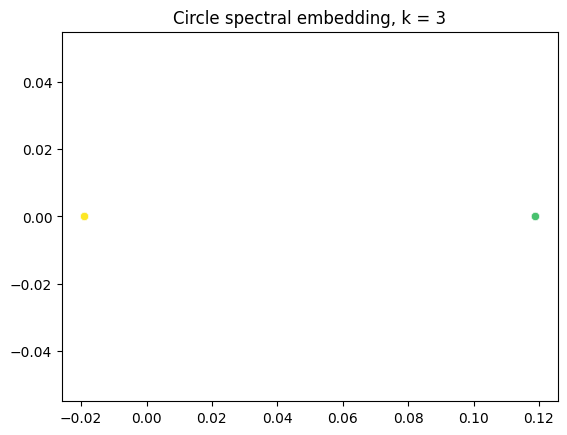

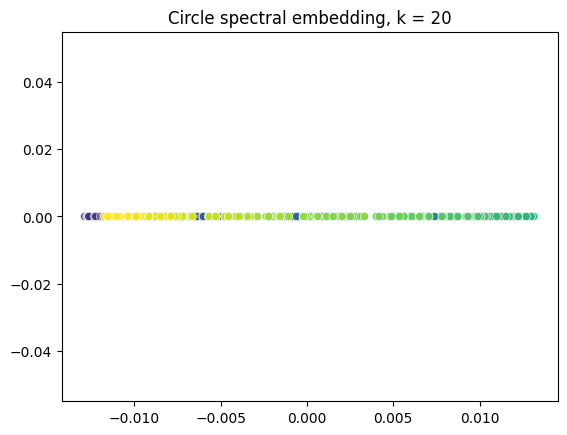

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


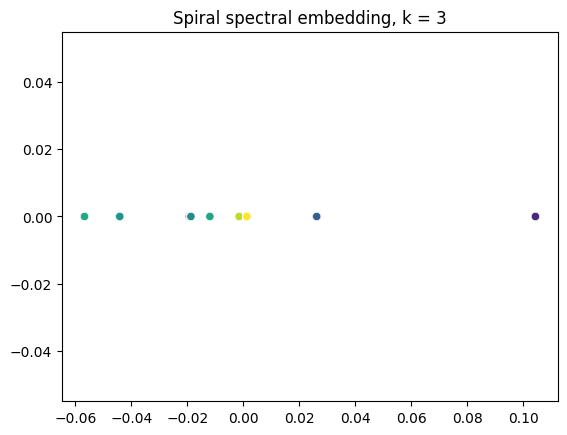

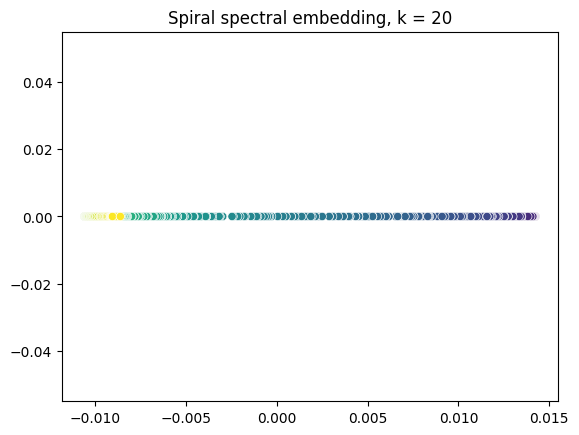

In [ ]:
from sklearn.manifold import spectral_embedding

knn_circle = mutual_knn(circle.T, 3)
se = spectral_embedding(knn_circle, n_components=1)
sns.scatterplot(x=se[:,0], y=np.zeros_like(se[:,0]), hue=range(len(se[:,0])), palette=circle_cmap, legend=False)
plt.title('Circle spectral embedding, k = 3')
plt.show()

knn_circle_20 = mutual_knn(circle.T, 20)
se = spectral_embedding(knn_circle_20, n_components=1)
sns.scatterplot(x=np.squeeze(se), y=np.zeros_like(np.squeeze(se)), hue=range(len(np.squeeze(se))), palette=circle_cmap, legend=False)
plt.title('Circle spectral embedding, k = 20')
plt.show()

knn_spiral = mutual_knn(spiral.T, 3)
se = spectral_embedding(knn_spiral, n_components=1)
sns.scatterplot(x=se[:,0], y=np.zeros_like(se[:, 0]), hue=range(len(se[:, 0])), palette=spiral_cmap, legend=False)
plt.title('Spiral spectral embedding, k = 3')
plt.show()

knn_spiral_20 = mutual_knn(spiral.T, 20)
se = spectral_embedding(knn_spiral_20, n_components=1)
sns.scatterplot(x=se[:,0], y=np.zeros_like(se[:, 0]), hue=range(len(se[:, 0])), palette=spiral_cmap, legend=False)
plt.title('Spiral spectral embedding, k = 20')
plt.show()